## Análise dos Dados

In [5]:
import os
import pandas as pd

treated_folder = "dados_tratados/combinado"
station_folders = [f for f in os.listdir(treated_folder) if os.path.isdir(os.path.join(treated_folder, f))]
for station_folder in station_folders:
    print(f"Análise dos dados para a estação: {station_folder}\n")
    
    treated_files = [f for f in os.listdir(os.path.join(treated_folder, station_folder)) if f.endswith(".csv")]
    
    for treated_file in reversed(treated_files):
        treated_file_path = os.path.join(treated_folder, station_folder, treated_file)
        
        # Carregar o arquivo CSV sem especificar dtype para 'Data e Hora'
        df = pd.read_csv(treated_file_path, parse_dates=['Data e Hora'], index_col='Data e Hora', low_memory=False)
        
        print("-" * 100)
        print(f"Arquivo tratado: {treated_file}")
        
        # Filtrar datas anteriores a 2015
        df = df[df.index.year >= 2015]
        
        print(f"Total de linhas após filtragem: {df.shape[0]}")
        
        # Verificar a porcentagem de dados ausentes
        missing_data = df.isnull().mean() * 100
        
        # Ordenar os valores em ordem decrescente
        sorted_missing_data = missing_data.sort_values(ascending=True)
        
        # Formatar os valores para inteiro e adicionar símbolo de porcentagem
        formatted_sorted_missing_data = sorted_missing_data.map(lambda x: f"{int(x)}%")
        
        formatted_sorted_missing_data = formatted_sorted_missing_data[formatted_sorted_missing_data != '100%']
        
        print("\nPorcentagem de dados ausentes (ordem decrescente):")
        print(formatted_sorted_missing_data)
        
        print("\n" + "-" * 50)


Análise dos dados para a estação: Cascata

----------------------------------------------------------------------------------------------------
Arquivo tratado: Cascata_tratado_combinado.csv
Total de linhas após filtragem: 70128

Porcentagem de dados ausentes (ordem decrescente):
Dióxido de Enxofre        8%
Dióxido de Nitrogênio     9%
Radiação Solar            9%
Direção do Vento         10%
Temperatura              10%
Umidade Relativa         10%
Velocidade do Vento      10%
Pressão Atmosférica      10%
Ozônio                   10%
PM10                     13%
Monóxido de Carbono      16%
PM2.5                    29%
dtype: object

--------------------------------------------------
Análise dos dados para a estação: Piratininga

----------------------------------------------------------------------------------------------------
Arquivo tratado: Piratininga_tratado_combinado.csv
Total de linhas após filtragem: 70128

Porcentagem de dados ausentes (ordem decrescente):
Pressão Atmosfér

In [6]:
import os
import pandas as pd

treated_folder = "dados_tratados/separado"
station_folders = [f for f in os.listdir(treated_folder) if os.path.isdir(os.path.join(treated_folder, f))]
for station_folder in station_folders:
    print(f"Análise dos dados para a estação: {station_folder}\n")
    
    treated_files = [f for f in os.listdir(os.path.join(treated_folder, station_folder)) if f.endswith(".csv")]
    
    for treated_file in reversed(treated_files):
        treated_file_path = os.path.join(treated_folder, station_folder, treated_file)
        df = pd.read_csv(treated_file_path, parse_dates=['Data e Hora'])
        
        print("-" * 100)
        print(f"Arquivo tratado: {treated_file}")
        print(f"Total de linhas: {df.shape[0]}")
        
        # Verificar a porcentagem de dados ausentes
        missing_data = df.isnull().mean() * 100
        
        # Ordenar os valores em ordem decrescente
        sorted_missing_data = missing_data.sort_values(ascending=False)
        
        # Formatar os valores para inteiro e adicionar símbolo de porcentagem
        formatted_sorted_missing_data = sorted_missing_data.map(lambda x: f"{int(x)}%")
        
        print("\nPorcentagem de dados ausentes (ordem decrescente):")
        print(formatted_sorted_missing_data)
        
        print("\n" + "-" * 50)


Análise dos dados para a estação: Cascata

----------------------------------------------------------------------------------------------------
Arquivo tratado: Cascata_2022_tratado.csv
Total de linhas: 8760

Porcentagem de dados ausentes (ordem decrescente):
PM2.5                    45%
Monóxido de Carbono      42%
PM10                     35%
Dióxido de Nitrogênio    32%
Dióxido de Enxofre       29%
Velocidade do Vento      29%
Umidade Relativa         28%
Direção do Vento         28%
Pressão Atmosférica      28%
Ozônio                   27%
Temperatura              27%
Radiação Solar           27%
Data e Hora               0%
dtype: object

--------------------------------------------------
----------------------------------------------------------------------------------------------------
Arquivo tratado: Cascata_2021_tratado.csv
Total de linhas: 8760

Porcentagem de dados ausentes (ordem decrescente):
PM10                     19%
PM2.5                    17%
Monóxido de Carbono   

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt

treated_folder = "dados_tratados/separado"
station_folders = [f for f in os.listdir(treated_folder) if os.path.isdir(os.path.join(treated_folder, f))]

for station_folder in station_folders:
    print(f"Análise descritiva para a estação: {station_folder}\n")
    
    treated_files = [f for f in os.listdir(os.path.join(treated_folder, station_folder)) if f.endswith(".csv")]
    
    for treated_file in reversed(treated_files):
        year = int(treated_file.split("_")[1])
        treated_file_path = os.path.join(treated_folder, station_folder, treated_file)
        df = pd.read_csv(treated_file_path, parse_dates=['Data e Hora'])
        
        if 'PM2.5' in df.columns and year >= 2015:
            print("-" * 100)
            print(f"Arquivo tratado: {treated_file}")

            print(f"\nAno: {year}")
            
            # Estatísticas descritivas básicas
            pm25_stats = df['PM2.5'].describe()
            print("Estatísticas descritivas para PM2.5:")
            print(pm25_stats)
            
            # Correlação entre PM2.5 e outras variáveis
            pm25_corr = df.corr(method='pearson')['PM2.5'].sort_values(ascending=False)
            print("\nCorrelação entre PM2.5 e outras variáveis:")
            print(pm25_corr)
            
            # Gaussiana
            skew = df['PM2.5'].skew()
            kurtosis = df['PM2.5'].kurtosis()
            print(f"\nAssimetria (skewness): {skew:.2f}")
            print(f"Curtose (kurtosis): {kurtosis:.2f}")
            
            

Análise descritiva para a estação: Cascata

----------------------------------------------------------------------------------------------------
Arquivo tratado: Cascata_2022_tratado.csv

Ano: 2022
Estatísticas descritivas para PM2.5:
count    4799.000000
mean       14.221921
std        10.154195
min         1.000000
25%         8.000000
50%        12.000000
75%        18.000000
max       113.000000
Name: PM2.5, dtype: float64

Correlação entre PM2.5 e outras variáveis:
PM2.5                    1.000000
PM10                     0.676695
Monóxido de Carbono      0.515932
Dióxido de Nitrogênio    0.378340
Dióxido de Enxofre       0.138135
Direção do Vento         0.071486
Umidade Relativa         0.011973
Pressão Atmosférica     -0.065515
Radiação Solar          -0.139598
Temperatura             -0.146869
Ozônio                  -0.166538
Velocidade do Vento     -0.274821
Data e Hora             -0.326011
Name: PM2.5, dtype: float64

Assimetria (skewness): 2.27
Curtose (kurtosis): 10.07


Análise descritiva para a estação: Cascata

----------------------------------------------------------------------------------------------------
Arquivo tratado: Cascata_2022_tratado.csv


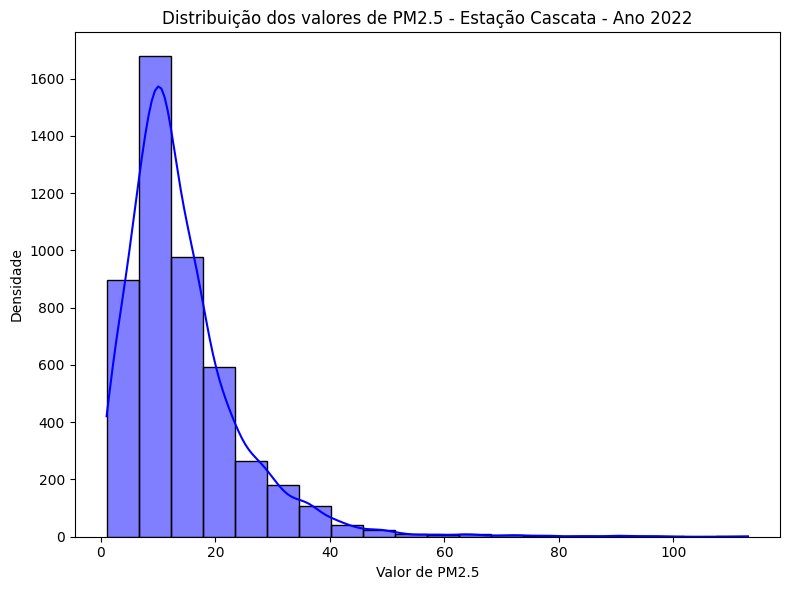

----------------------------------------------------------------------------------------------------
Arquivo tratado: Cascata_2021_tratado.csv


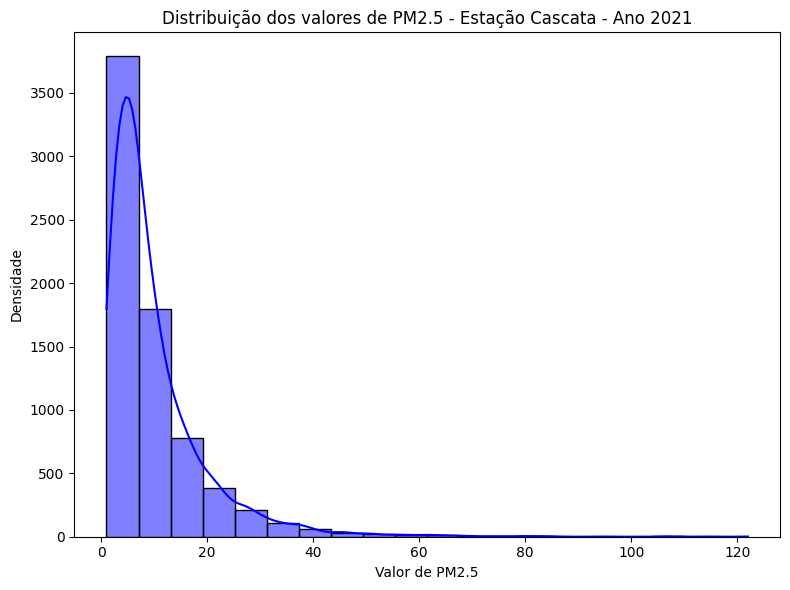

----------------------------------------------------------------------------------------------------
Arquivo tratado: Cascata_2020_tratado.csv


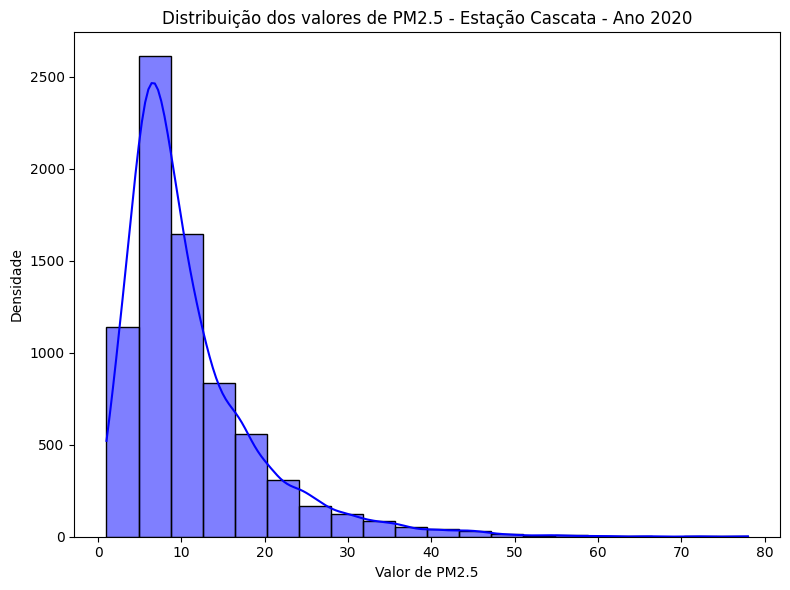

----------------------------------------------------------------------------------------------------
Arquivo tratado: Cascata_2019_tratado.csv


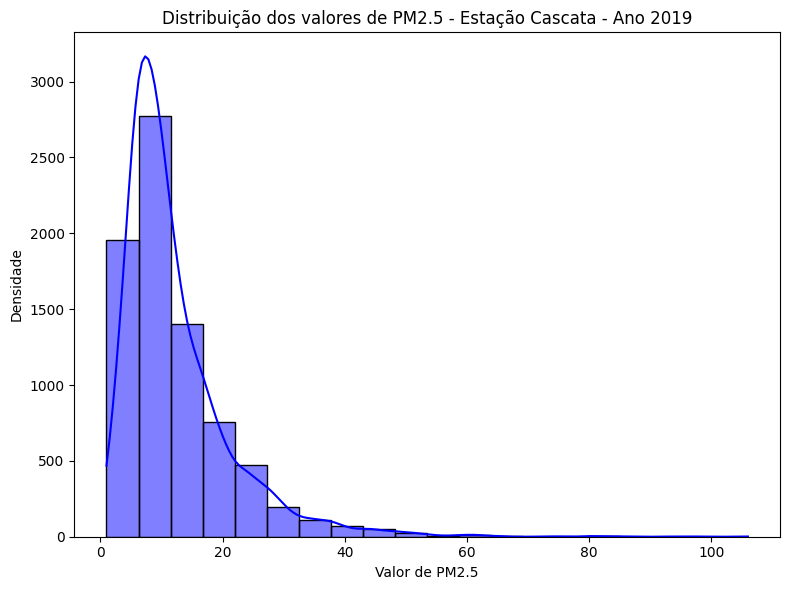

----------------------------------------------------------------------------------------------------
Arquivo tratado: Cascata_2018_tratado.csv


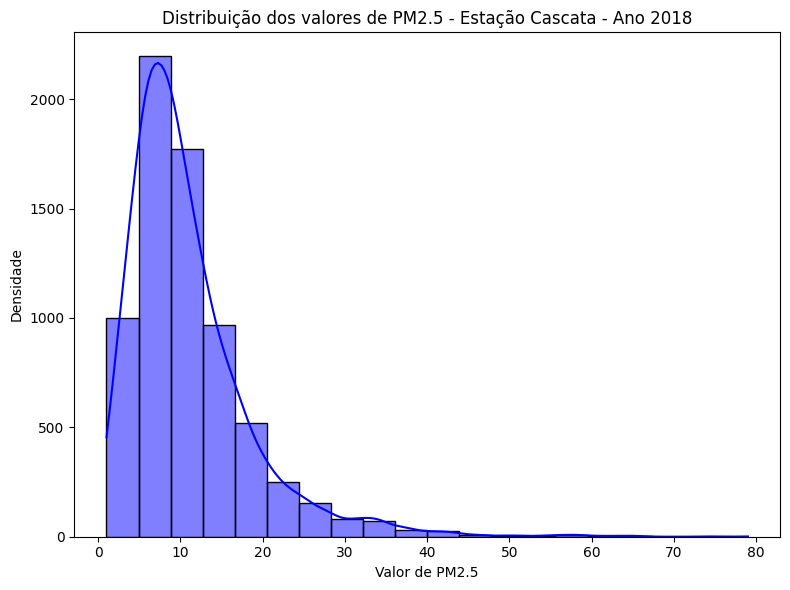

----------------------------------------------------------------------------------------------------
Arquivo tratado: Cascata_2017_tratado.csv


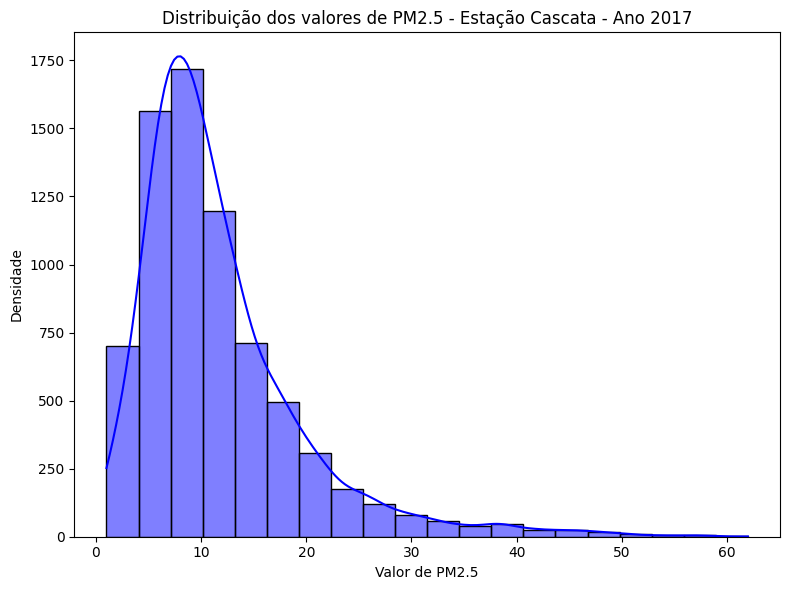

----------------------------------------------------------------------------------------------------
Arquivo tratado: Cascata_2016_tratado.csv


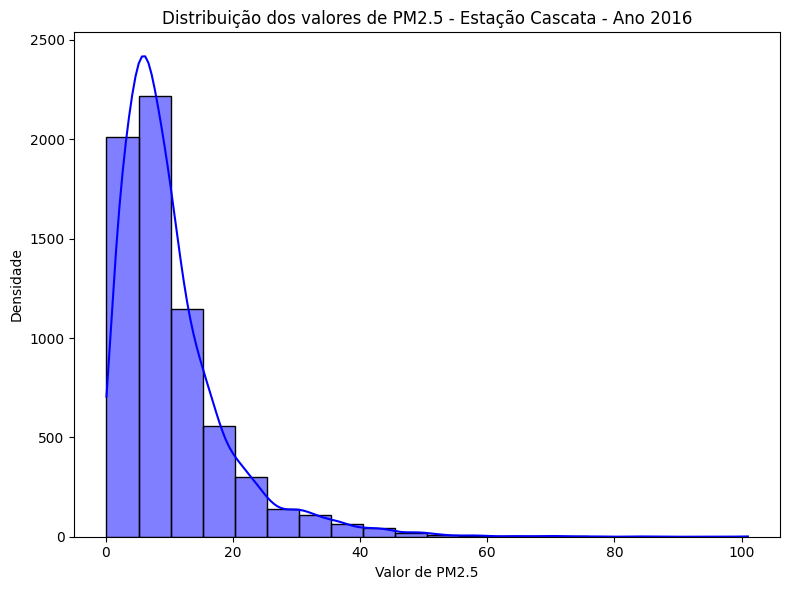

----------------------------------------------------------------------------------------------------
Arquivo tratado: Cascata_2015_tratado.csv


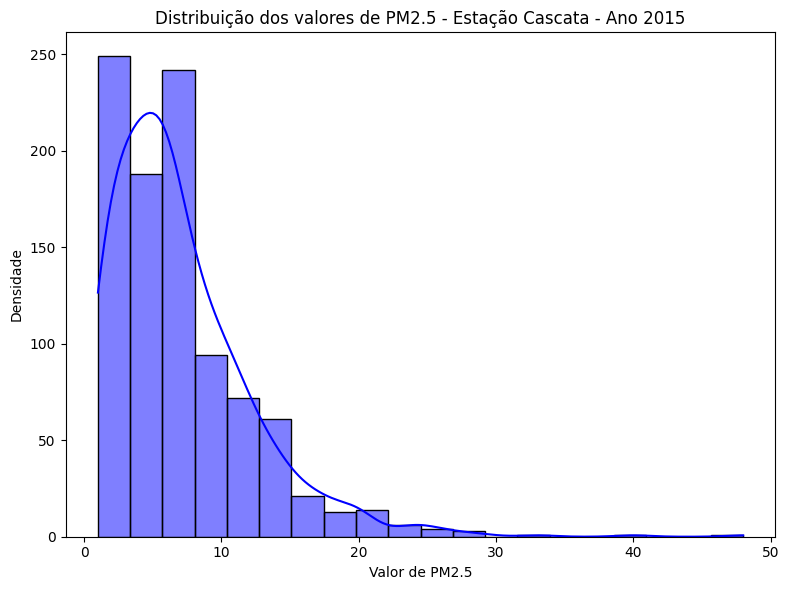

----------------------------------------------------------------------------------------------------
Arquivo tratado: Cascata_2014_tratado.csv

Ano: 2014
A coluna 'PM2.5' não está presente nos dados.
----------------------------------------------------------------------------------------------------
Arquivo tratado: Cascata_2013_tratado.csv

Ano: 2013
A coluna 'PM2.5' não está presente nos dados.
----------------------------------------------------------------------------------------------------
Arquivo tratado: Cascata_2012_tratado.csv

Ano: 2012
A coluna 'PM2.5' não está presente nos dados.
----------------------------------------------------------------------------------------------------
Arquivo tratado: Cascata_2011_tratado.csv

Ano: 2011
A coluna 'PM2.5' não está presente nos dados.
----------------------------------------------------------------------------------------------------
Arquivo tratado: Cascata_2010_tratado.csv

Ano: 2010
A coluna 'PM2.5' não está presente nos dados.


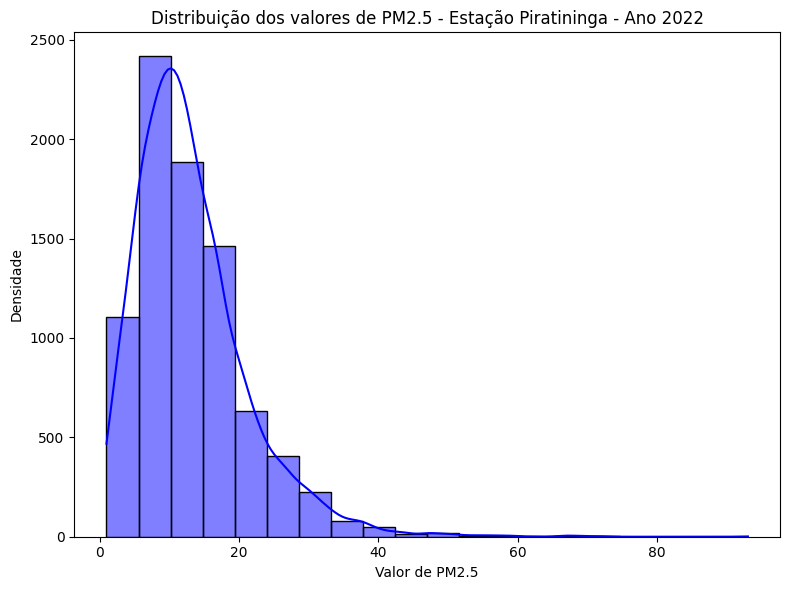

----------------------------------------------------------------------------------------------------
Arquivo tratado: Piratininga_2021_tratado.csv


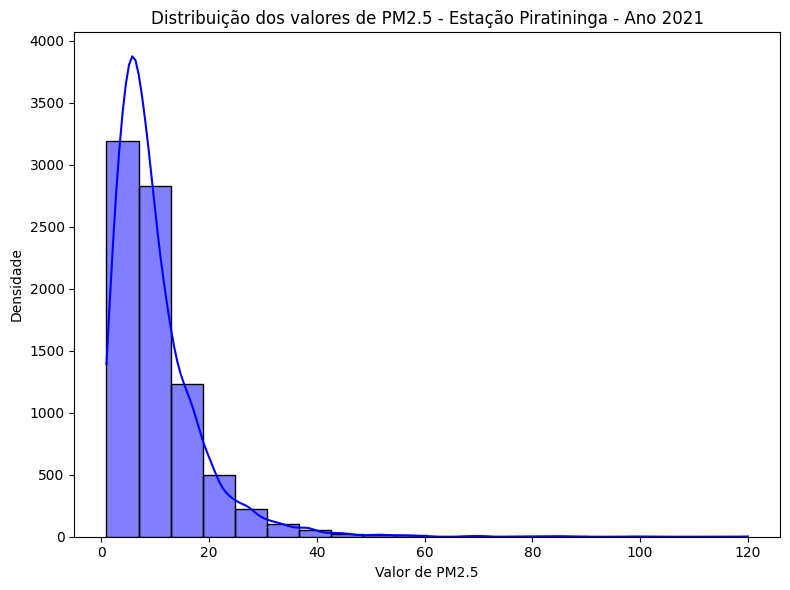

----------------------------------------------------------------------------------------------------
Arquivo tratado: Piratininga_2020_tratado.csv


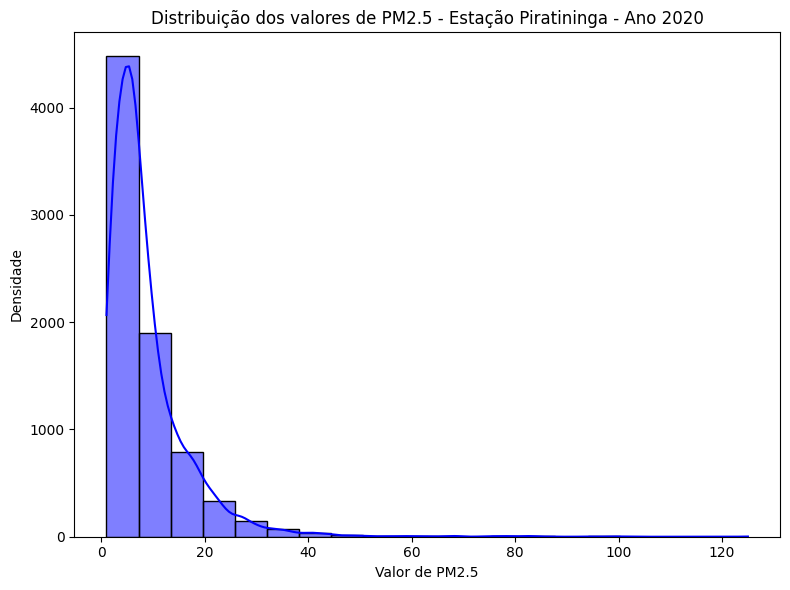

----------------------------------------------------------------------------------------------------
Arquivo tratado: Piratininga_2019_tratado.csv


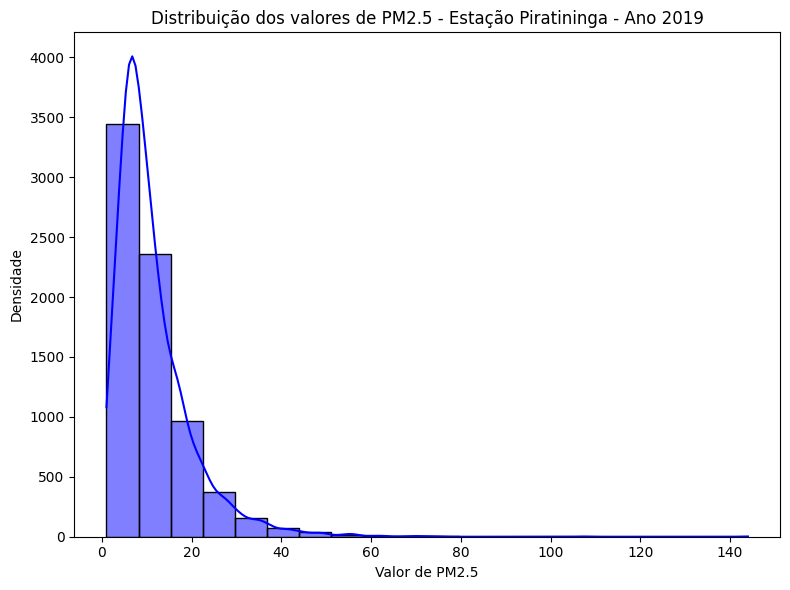

----------------------------------------------------------------------------------------------------
Arquivo tratado: Piratininga_2018_tratado.csv


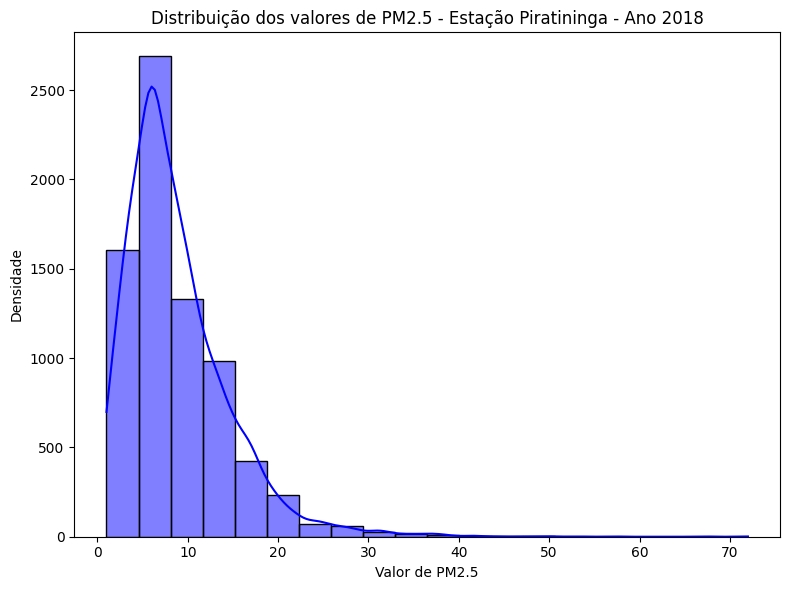

----------------------------------------------------------------------------------------------------
Arquivo tratado: Piratininga_2017_tratado.csv


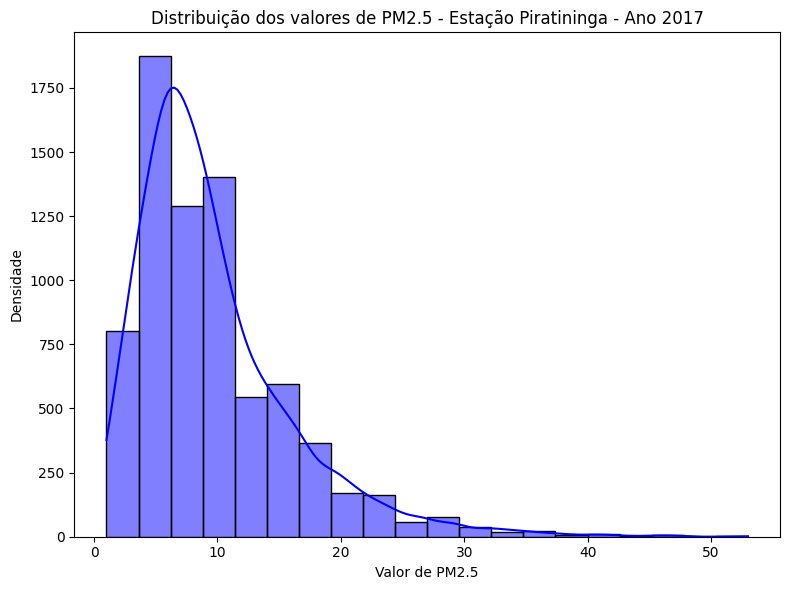

----------------------------------------------------------------------------------------------------
Arquivo tratado: Piratininga_2016_tratado.csv


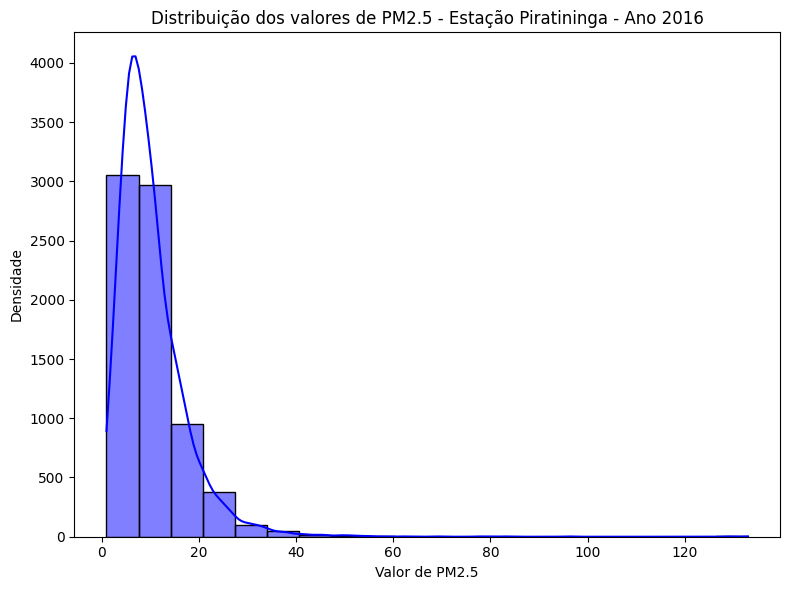

----------------------------------------------------------------------------------------------------
Arquivo tratado: Piratininga_2015_tratado.csv


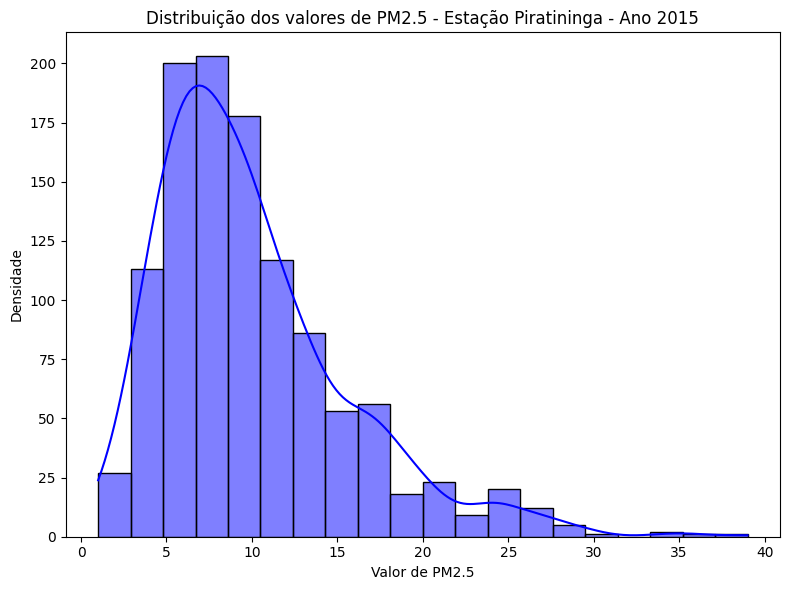

----------------------------------------------------------------------------------------------------
Arquivo tratado: Piratininga_2014_tratado.csv

Ano: 2014
A coluna 'PM2.5' não está presente nos dados.
----------------------------------------------------------------------------------------------------
Arquivo tratado: Piratininga_2013_tratado.csv

Ano: 2013
A coluna 'PM2.5' não está presente nos dados.
----------------------------------------------------------------------------------------------------
Arquivo tratado: Piratininga_2012_tratado.csv

Ano: 2012
A coluna 'PM2.5' não está presente nos dados.
----------------------------------------------------------------------------------------------------
Arquivo tratado: Piratininga_2011_tratado.csv

Ano: 2011
A coluna 'PM2.5' não está presente nos dados.
----------------------------------------------------------------------------------------------------
Arquivo tratado: Piratininga_2010_tratado.csv

Ano: 2010
A coluna 'PM2.5' não está 

In [8]:
import seaborn as sns

treated_folder = "dados_tratados/separado"
station_folders = [f for f in os.listdir(treated_folder) if os.path.isdir(os.path.join(treated_folder, f))]

for station_folder in station_folders:
    print(f"Análise descritiva para a estação: {station_folder}\n")

    treated_files = [f for f in os.listdir(os.path.join(treated_folder, station_folder)) if f.endswith(".csv")]

    for treated_file in reversed(treated_files):
        print("-" * 100)
        print(f"Arquivo tratado: {treated_file}")
        year = int(treated_file.split("_")[1])
        treated_file_path = os.path.join(treated_folder, station_folder, treated_file)
        df = pd.read_csv(treated_file_path, parse_dates=['Data e Hora'])

        if 'PM2.5' in df.columns and year >= 2015:            
            # Verificar a distribuição dos valores de PM2.5 usando gráfico de densidade
            plt.figure(figsize=(8, 6))
            sns.histplot(df, x='PM2.5', kde=True, bins=20, color='blue', edgecolor='black')
            plt.xlabel('Valor de PM2.5')
            plt.ylabel('Densidade')
            plt.title(f'Distribuição dos valores de PM2.5 - Estação {station_folder} - Ano {year}')
            plt.tight_layout()
            plt.show()
            
            # # Identificar possíveis outliers
            # q1 = df['PM2.5'].quantile(0.25)
            # q3 = df['PM2.5'].quantile(0.75)
            # iqr = q3 - q1
            # lower_bound = q1 - (1.5 * iqr)
            # upper_bound = q3 + (1.5 * iqr)
            # outliers = df[(df['PM2.5'] < lower_bound) | (df['PM2.5'] > upper_bound)]
            # print(f"\nPossíveis outliers para PM2.5 ({len(outliers)} ocorrências):")
            # print(outliers['PM2.5'])
        
        else:
            print(f"\nAno: {year}")
            print("A coluna 'PM2.5' não está presente nos dados.")
    
    print("\n" + "-" * 50)


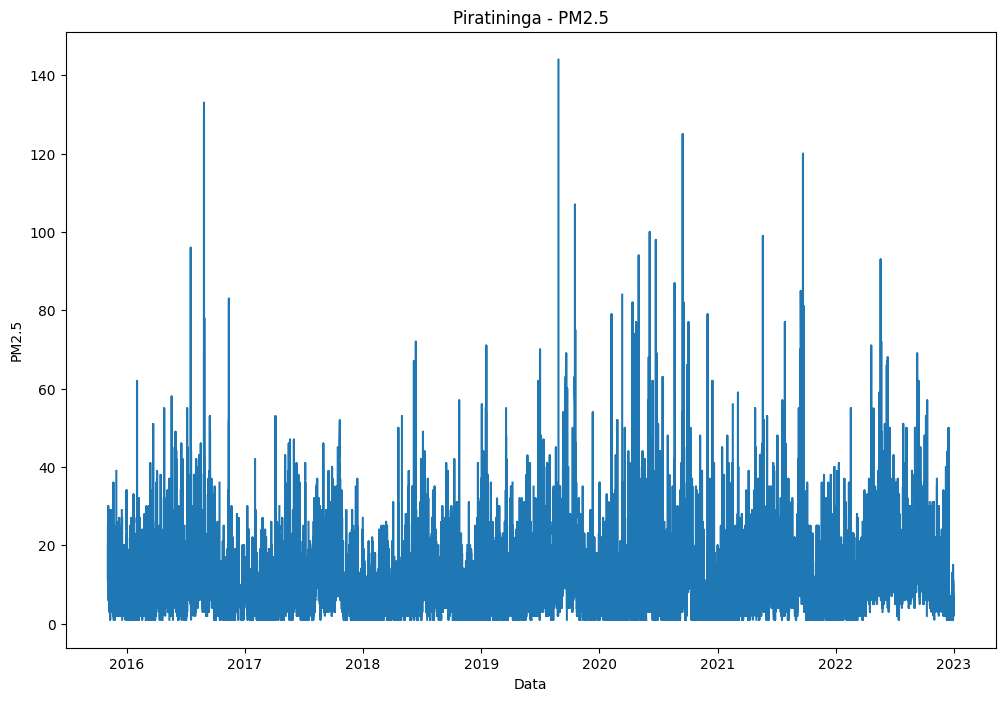

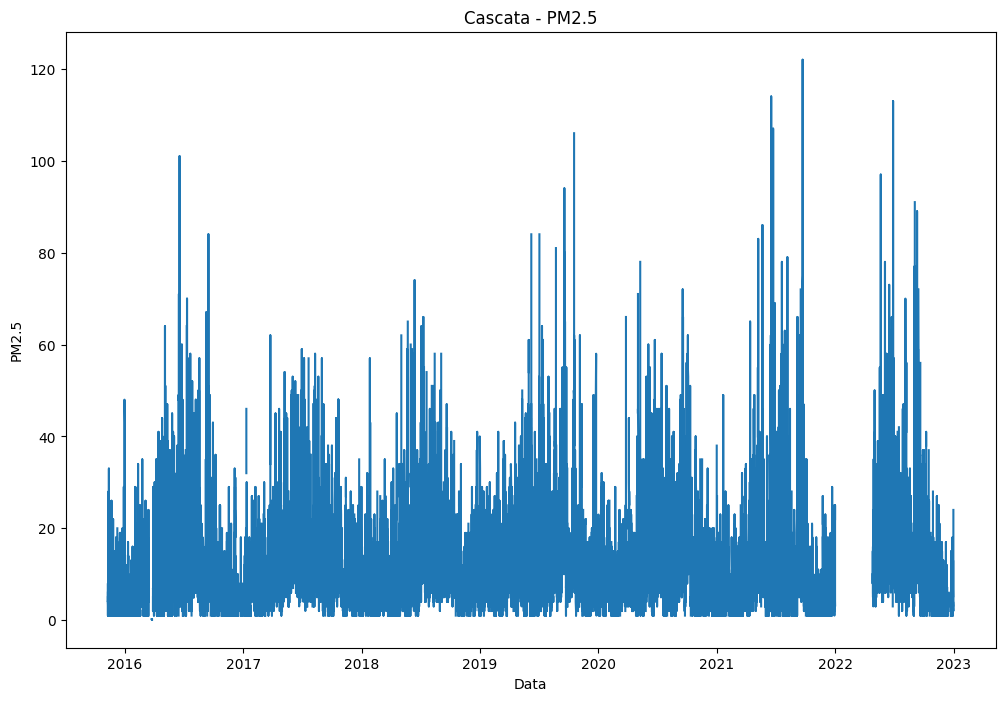

In [9]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# pega os nomes da estacoes
main_folder = "data"
station_folders = [f for f in os.listdir(main_folder) if os.path.isdir(os.path.join(main_folder, f))]

#plota os graficos
for station_folder in reversed(station_folders):
    combined_data = pd.read_csv(f"dados_tratados/combinado/{station_folder}/{station_folder}_tratado_combinado.csv", usecols=['Data e Hora', 'PM2.5'])
    combined_data['Data e Hora'] = pd.to_datetime(combined_data['Data e Hora'], format='%Y-%m-%d %H:%M:%S', errors='coerce').dt.date
    combined_data = combined_data.set_index('Data e Hora')
    
    # Aumentando o tamanho do gráfico
    plt.figure(figsize=(12, 8))  
    
    combined_data['PM2.5'].plot()
    plt.title(f"{station_folder} - PM2.5")
    plt.xlabel('Data')
    plt.ylabel('PM2.5')
    
    plt.show()


In [10]:
# descubrir quais epocas do ano pm2.5 eh mais elevado

import pandas as pd
import os
import matplotlib.pyplot as plt

# pega os nomes da estacoes
main_folder = "data"
station_folders = [f for f in os.listdir(main_folder) if os.path.isdir(os.path.join(main_folder, f))]

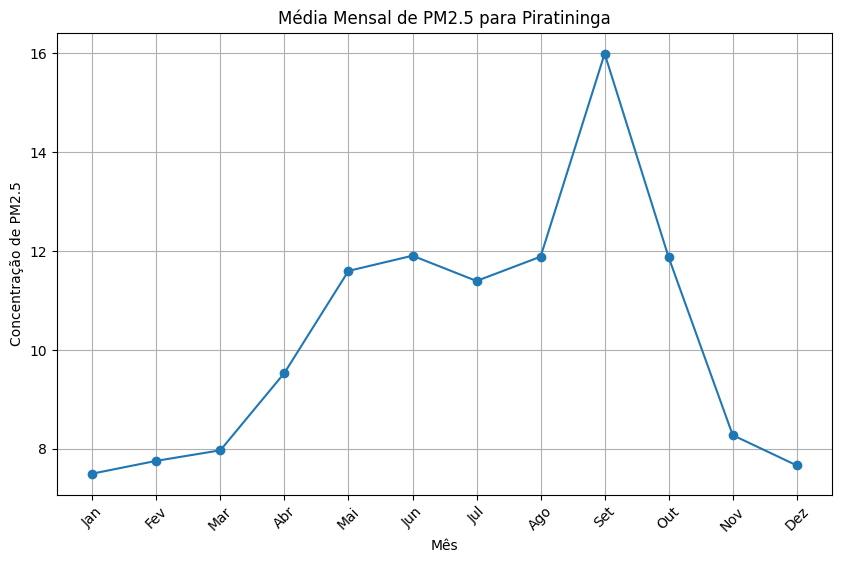

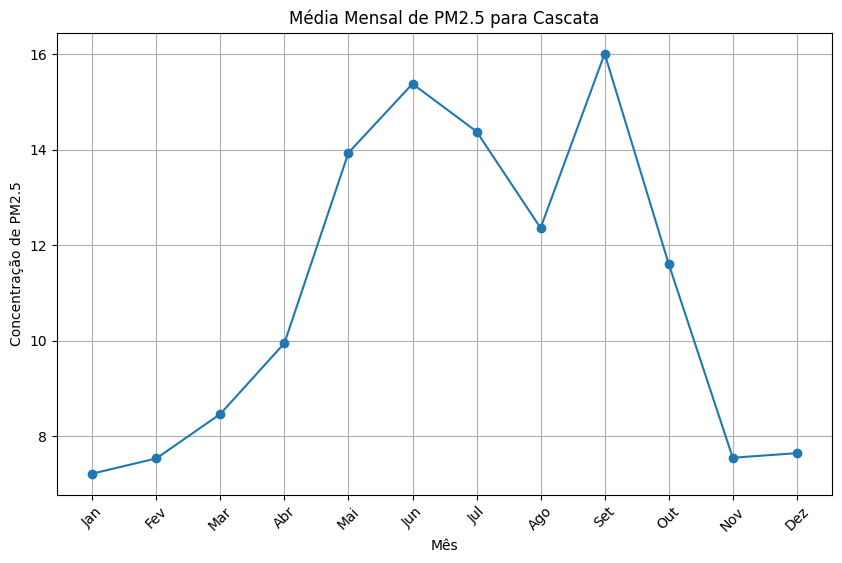

In [11]:
for station_folder in reversed(station_folders):
    combined_data = pd.read_csv(f"dados_tratados/combinado/{station_folder}/{station_folder}_tratado_combinado.csv", usecols=['Data e Hora', 'PM2.5'])
    combined_data['Data e Hora'] = pd.to_datetime(combined_data['Data e Hora'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
    
    # Cria uma coluna para o mês
    combined_data['Mes'] = combined_data['Data e Hora'].dt.month
    
    # Agrupa por mês e calcula a média de PM2.5
    monthly_avg_pm25 = combined_data.groupby('Mes')['PM2.5'].mean().reset_index()
    
    # Plotagem
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_avg_pm25['Mes'], monthly_avg_pm25['PM2.5'], marker='o', linestyle='-')
    plt.title(f'Média Mensal de PM2.5 para {station_folder}')
    plt.xlabel('Mês')
    plt.ylabel('Concentração de PM2.5')
    plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], rotation=45)
    plt.grid(True)
    plt.show()